In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [56]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [24]:
df = pd.read_csv('spam_ham.csv', sep=';', encoding='latin-1')

In [30]:
df['Label'] = df['Label'].str.strip('"')

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     5565 non-null   object
 1   SMS_TEXT  5562 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB
None


In [42]:
print(df['SMS_TEXT'].isnull().sum())

0


In [41]:
df = df.dropna(subset=['SMS_TEXT'])

In [43]:
df['SMS_TEXT'] = df['SMS_TEXT'].astype(str)

### Muestra eleatoria de 5 mensajes

In [ ]:
print(df.sample(5))

Muestra aleatoria de 5 mensajes:
     Label                                           SMS_TEXT
1845   ham  Its on in engalnd! But telly has decided it wo...
3484   ham  No:-)i got rumour that you going to buy apartm...
1276   ham              Dont put your phone on silent mode ok
1877   ham                  I AM AT A PARTY WITH ALEX NICHOLS
164    ham  I place all ur points on e cultures module alr...


In [32]:
print("Cantidad total de mensajes:", len(df))

Cantidad total de mensajes: 5565


### Visualizaciones

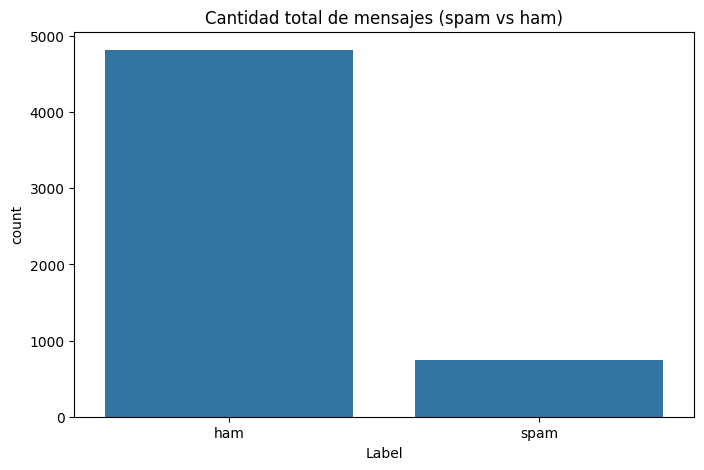

In [ ]:
#cantidad total
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label')
plt.title('Cantidad total de mensajes (spam vs ham)')
plt.show()

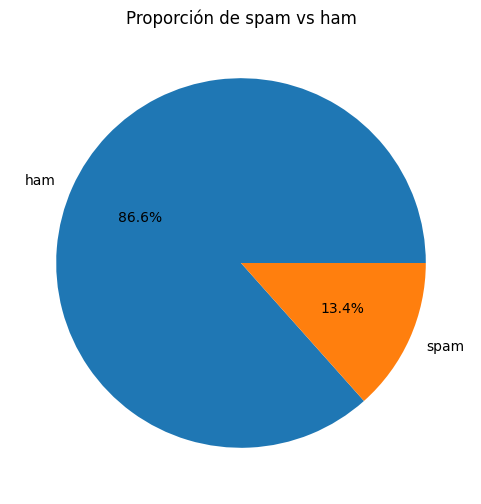

In [ ]:
#proporción 
plt.figure(figsize=(6, 6))
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de spam vs ham')
plt.ylabel('')
plt.show()

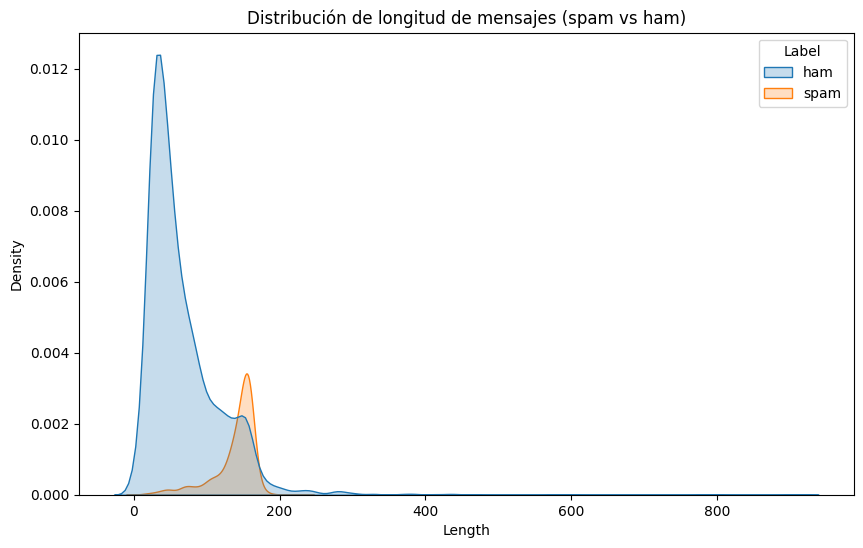

In [ ]:
#densidad de longitud
df['Length'] = df['SMS_TEXT'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Length', hue='Label', fill=True)
plt.title('Distribución de longitud de mensajes (spam vs ham)')
plt.show()

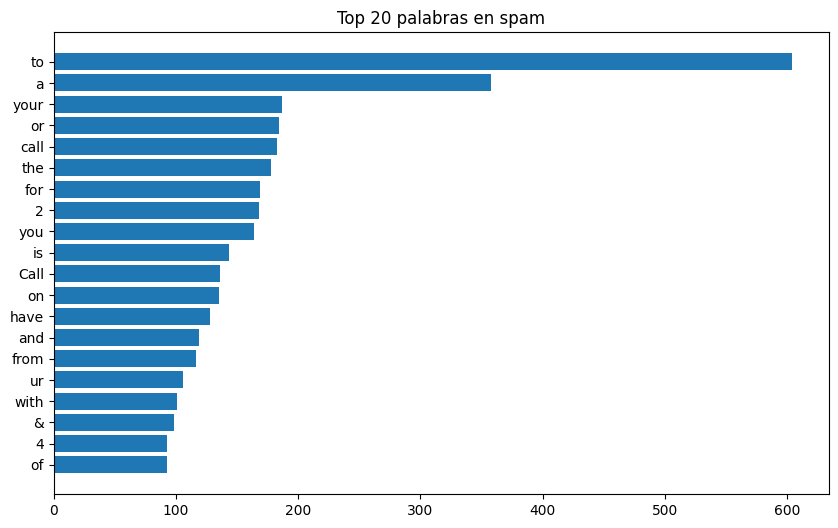

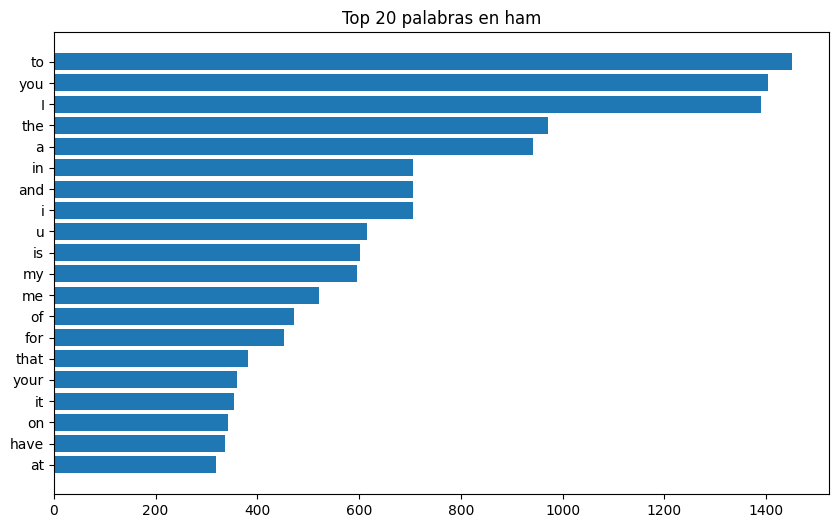

In [ ]:
# 20 palabras más frecuentes
def plot_top_words(text_series, title):
    words = ' '.join(text_series).split()
    freq_dist = nltk.FreqDist(words)
    top_words = freq_dist.most_common(20)
    plt.figure(figsize=(10, 6))
    plt.barh([word[0] for word in top_words], [word[1] for word in top_words])
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()
plot_top_words(df[df['Label'] == 'spam']['SMS_TEXT'], 'Top 20 palabras en spam')
plot_top_words(df[df['Label'] == 'ham']['SMS_TEXT'], 'Top 20 palabras en ham')

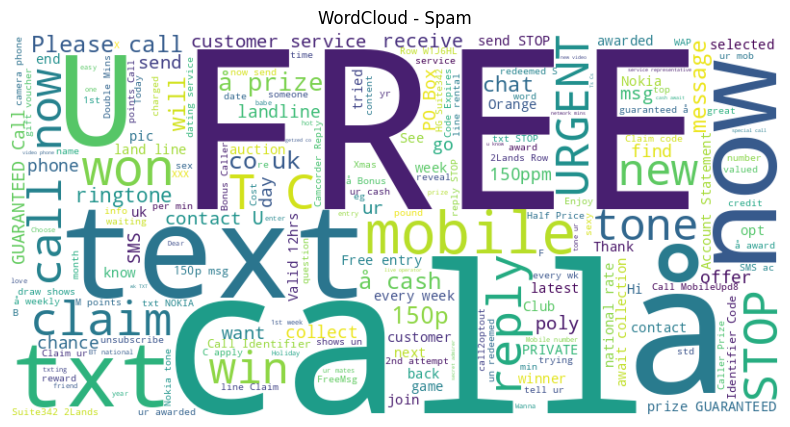

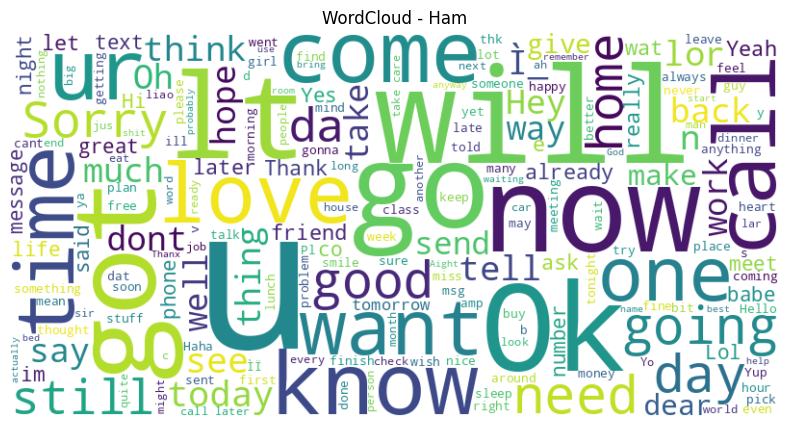

In [ ]:
#wordcloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(' '.join(df[df['Label'] == 'spam']['SMS_TEXT']), 'WordCloud - Spam')
generate_wordcloud(' '.join(df[df['Label'] == 'ham']['SMS_TEXT']), 'WordCloud - Ham')

## Procesamiento de texto

In [55]:
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Conversión a minúsculas
    tokens = [word.lower() for word in tokens]
    # Eliminación de signos de puntuación
    tokens = [word for word in tokens if word not in string.punctuation]
    # Eliminación de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming (justificación: más rápido que lemmatization para este caso)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [57]:
df['Processed_Text'] = df['SMS_TEXT'].apply(preprocess_text)
print("\nEjemplo de texto antes y después del preprocesamiento:")
print("Original:", df['SMS_TEXT'].iloc[0])
print("Procesado:", df['Processed_Text'].iloc[0])


Ejemplo de texto antes y después del preprocesamiento:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Procesado: go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...


### posterior al procesamiento de texto

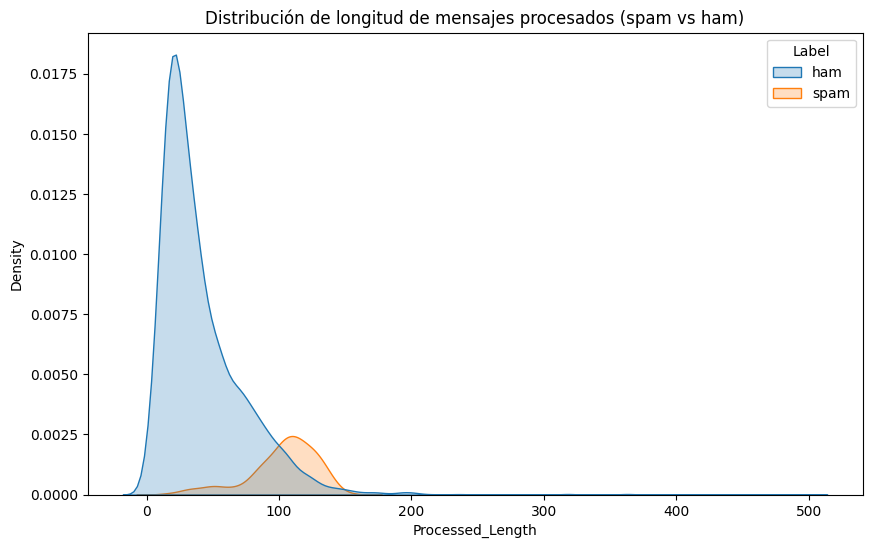

In [58]:
df['Processed_Length'] = df['Processed_Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Processed_Length', hue='Label', fill=True)
plt.title('Distribución de longitud de mensajes procesados (spam vs ham)')
plt.show()

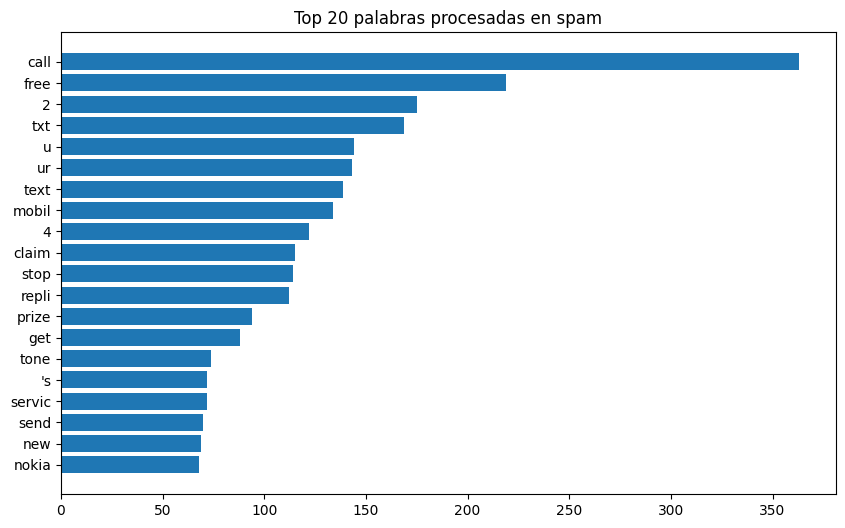

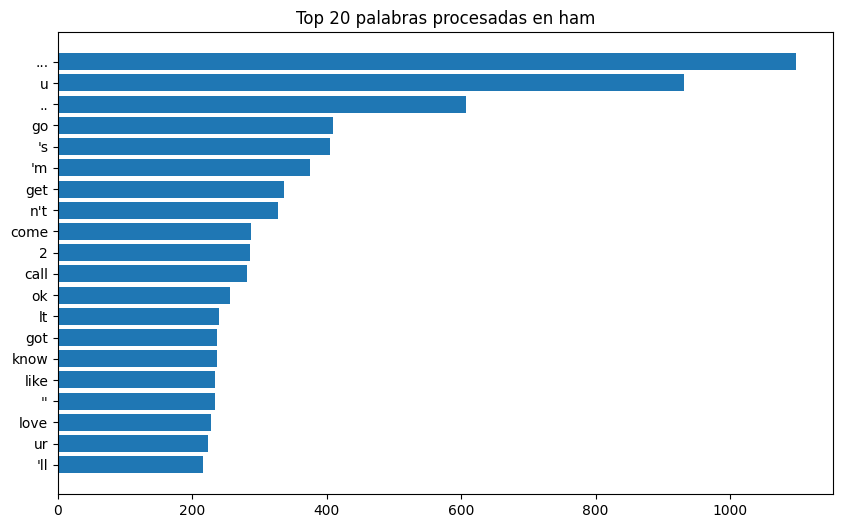

In [59]:
plot_top_words(df[df['Label'] == 'spam']['Processed_Text'], 'Top 20 palabras procesadas en spam')
plot_top_words(df[df['Label'] == 'ham']['Processed_Text'], 'Top 20 palabras procesadas en ham')

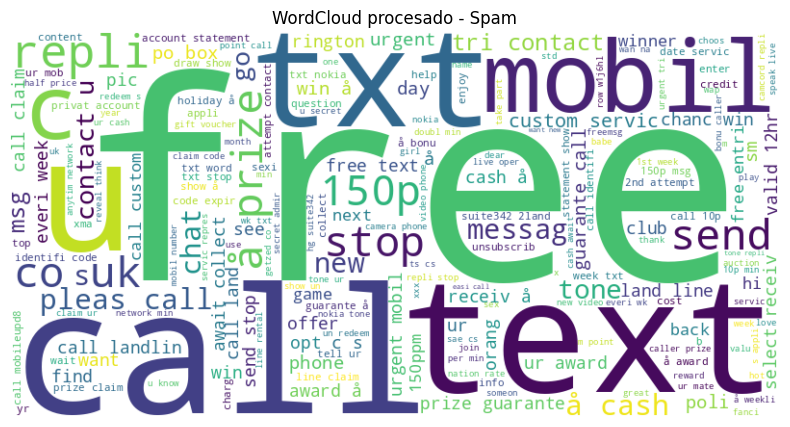

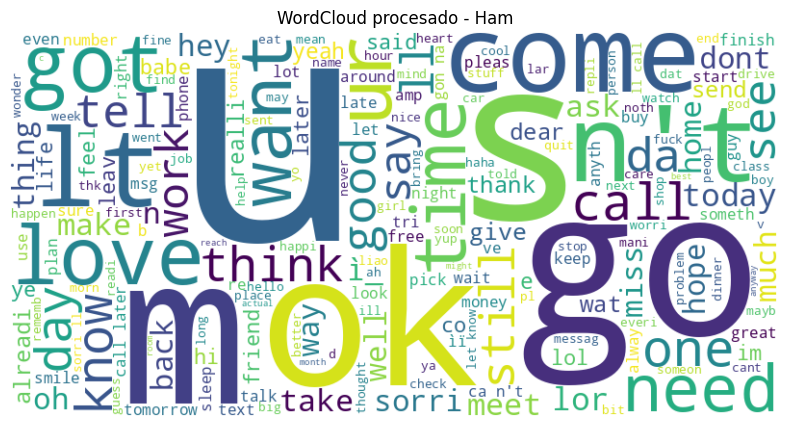

In [60]:
generate_wordcloud(' '.join(df[df['Label'] == 'spam']['Processed_Text']), 'WordCloud procesado - Spam')
generate_wordcloud(' '.join(df[df['Label'] == 'ham']['Processed_Text']), 'WordCloud procesado - Ham')

In [61]:
print("\nReflexión y análisis:")
print("- Cambios notorios: Tras el preprocesamiento, las palabras se reducen a su raíz, eliminando ruido (stopwords, puntuación).")
print("- Palabras en común: Pueden aparecer palabras como 'u' o 'call' en ambos grupos, pero con distinta frecuencia.")
print("- Palabras exclusivas: Spam suele contener términos como 'free', 'win', 'prize', mientras que ham usa palabras más cotidianas como 'ok', 'go', 'later'.")
print("- Características útiles: Longitud del mensaje, presencia de palabras promocionales o enlaces, y frecuencia de términos específicos.")


Reflexión y análisis:
- Cambios notorios: Tras el preprocesamiento, las palabras se reducen a su raíz, eliminando ruido (stopwords, puntuación).
- Palabras en común: Pueden aparecer palabras como 'u' o 'call' en ambos grupos, pero con distinta frecuencia.
- Palabras exclusivas: Spam suele contener términos como 'free', 'win', 'prize', mientras que ham usa palabras más cotidianas como 'ok', 'go', 'later'.
- Características útiles: Longitud del mensaje, presencia de palabras promocionales o enlaces, y frecuencia de términos específicos.
